# Analysis

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler


sns.set(rc={'figure.figsize':(12,8)})

In [34]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [35]:
pd.options.display.max_rows=None

In [36]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,2,66.0
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,2,78.0
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,2,35.0
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,2,105.0


In [39]:
data['Survived'].value_countsounts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:

dataset = data.copy()


## Train And test Dataset

In [7]:
y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)



In [8]:
x.columns.values

array(['Pclass', 'Sex', 'Age', 'Embarked', 'Total_Members', 'Title'],
      dtype=object)

In [9]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])


In [10]:
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
0,-0.527806,0.059160,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.673375,0.059160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.227511,-0.560975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.448153,0.059160,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.448153,-0.560975,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=32,shuffle=True)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 21) , Train Shape (712, 21)


# Modelling

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

### Statsmodels Logitics Regression

In [16]:
#temp = sm.add_constant(x_train)
res = sm.Logit(y_train,x_train)
res = res.fit()
#res = res

def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)

print('Train Accuracy:', get_accuracy(x_train,y_train,res))
print('Test Accuracy:', get_accuracy(x_test,y_test,res))


         Current function value: 0.395315
         Iterations: 35


LinAlgError: Singular matrix

In [134]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.660
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              70.84
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                   4.28e-148
Time:                        13:40:13   Log-Likelihood:                         -282.21
No. Observations:                 712   AIC:                                      602.4
Df Residuals:                     693   BIC:                                      689.2
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0508      0.018     -2.838      0.005      -0.086      -0.016
Total_Members     -0.0982      0.016     -6.202      0.000      -0.129      -0.067
Pclass_2          -0.1643      0.045     -3.655      0.000      -0.253      -0.076
Pclass_3          -0.3454      0.040     -8.536      0.000      -0.425      -0.266
Sex_male          -0.6533      0.042    -15.416      0.000      -0.737      -0.570
Embarked_Q        -0.0263      0.060     -0.436      0.663      -0.145       0.092
Embarked_S        -0.0792      0.037     -2.124      0.034      -0.152      -0.006
Title_Col          0.7956      0.371      2.147      0.032       0.068       1.523
Title_Countess     1.0393      0.367      2.835      0.005       0.319       1.759
Title_Don      -7.561e-16   1.57e-16     -4.827      0.000   -1.06e-15   -4.49e-16
Title_Dr           1.1914      0.157      7.593      0.000       0.883       1.499
Title_Jonkheer     0.7116      0.369      1.931      0.054      -0.012       1.435
Title_Jr           1.8833      0.371      5.078      0.000       1.155       2.611
Title_Major        1.2517      0.264      4.735      0.000       0.733       1.771
Title_Master       1.6499      0.089     18.445      0.000       1.474       1.825
Title_Miss         0.9408      0.045     21.041      0.000       0.853       1.029
Title_Mlle     -2.758e-16   1.05e-16     -2.637      0.009   -4.81e-16   -7.05e-17
Title_Mme          0.9257      0.365      2.538      0.011       0.210       1.642
Title_Mr           1.0930      0.050     22.049      0.000       0.996       1.190
Title_Ms           1.1845      0.368      3.218      0.001       0.462       1.907
Title_Rev          0.9133      0.196      4.648      0.000       0.528       1.299
==============================================================================
Omnibus:                       42.095   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.430
Skew:                           0.595   Prob(JB):                     3.04e-11
Kurtosis:                       3.463   Cond. No.                     3.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:

res = LogisticRegression()
res = res.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [18]:
def get_accuracy(data_x,data_y,model):
    l = []
    for fo in model.predict(data_x).round(2):
        if fo >0.5:
            l.append(1)
        else:
            l.append(0)
    return accuracy_score(data_y,l)


In [19]:
print('Train Accuracy:', get_accuracy(x_train,y_train,res))
print('Test Accuracy:', get_accuracy(x_test,y_test,res))

Train Accuracy: 0.8426966292134831
Test Accuracy: 0.8044692737430168


## Create Submission

In [20]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Age,Embarked,Title,Total_Members
193,2,male,61.0,Q,Mr,0
59,1,female,36.0,C,Miss,0
2,2,male,62.0,Q,Mr,0
15,2,female,24.0,C,Mr,1
261,3,male,21.0,S,Mr,0


In [21]:
test_data = encoder.transform(test_data)
test_data.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
193,61.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,36.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,62.0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,24.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
261,21.0,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
test_data[['Age','Total_Members']] = scaler.fit_transform(test_data[['Age','Total_Members']])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Age,Total_Members,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,Title_Countess,Title_Don,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
193,2.446669,-0.553443,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,0.519287,-0.553443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2.523764,-0.553443,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,-0.405857,0.105643,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
261,-0.637143,-0.553443,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
#res = DecisionTreeClassifier(max_depth=4,criterion="entropy").fit(x,y)
dataset = dataset.sample(frac=1)


y = dataset['Survived']
cols_to_drop = ['Survived','PassengerId','Parch', 'Fare','Age_Group', 'SibSp','Multiply','Cabin_Codes']
x = dataset.drop(cols_to_drop,axis=1)
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=['Pclass','Sex','Embarked','Title'])
scaler = StandardScaler()
x[['Total_Members','Age']] = scaler.fit_transform(x[['Total_Members','Age']])
x.head()

#res = sm.OLS(y,sm.add_constant(x))
#res = res.fit()

res = LinearRegression()
res = res.fit(x,y)

#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))
print('Train Accuracy:' ,get_accuracy(x,y,res))

Train Accuracy: 0.8338945005611672


In [25]:
#pred_values = res.predict(test_data)
l = []
for x in res.predict(test_data).round(2):
    if x >0.5:
        l.append(1)
    else:
        l.append(0)

In [26]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': l
                        })
result = result.sort_values(by='PassengerId')

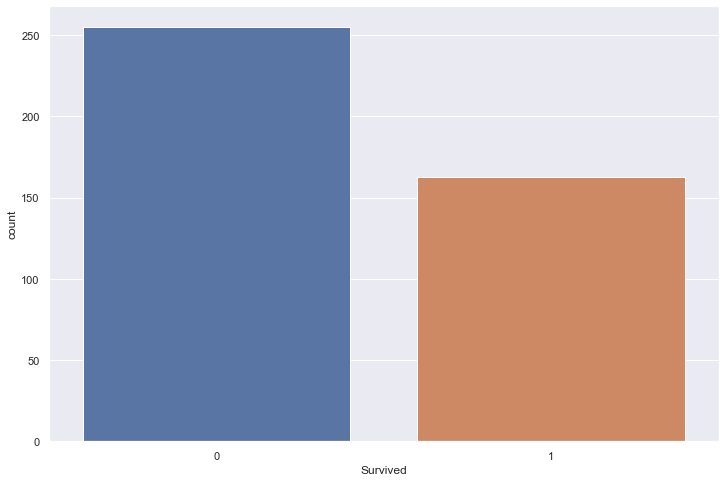

In [27]:
sns.countplot(result['Survived'])

In [225]:
result.shape

(418, 2)

In [226]:
result.to_csv('Prediction_16.csv',index=False)